# Data visualizations

This last part of the project consists of two major parts: (A) usual analyses and visualization, and (B) spatial analysis using geopandas. In (A) we analyse various core but also minor (yet interesting) aspects. In (B) we visualize on the map of Prague districts the intensity of rents supplied but also average prices per each district. Our goal was not to dive into one narrow path analysing a single aspect, our goal is to provide a broad range of possible approaches and method when analysing data from sReality. If interested, variety of the analysed variables can be easily replaced by variables of a reader's interest - our code provide solid tools to do that.

In [126]:
import pandas as pd
import numpy as np

In [127]:
data1 = pd.read_csv('clean_data.csv', sep=';',index_col = [0])

In [128]:
%matplotlib inline
import matplotlib.pyplot as plt

In [129]:
import import_ipynb # %pip install import_ipynb

In [130]:
# we want to use one function from previous jupyter
def group_exm(var_name): #this function returns values and they frequency of occurence
    return data1.groupby(var_name)[var_name].count()

# A) Usual analyses and visualizations

In this section we pick couple of variable and visualise their relationships. We focused on variaty in visualisation technics rather than deep understanding of relationships in our data

## Prices inspection

In [131]:
data1['Cena'].describe() #quick look at the dispertion of prices

count      7646.000000
mean      22432.486529
std       16053.091726
min          12.000000
25%       13500.000000
50%       17500.000000
75%       25000.000000
max      240000.000000
Name: Cena, dtype: float64

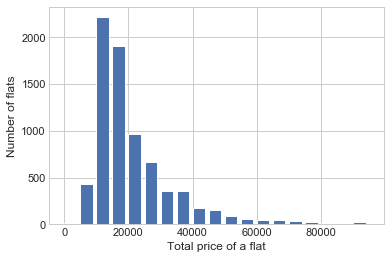

In [132]:
#histogram
plt.style.use('seaborn-whitegrid')
np.histogram(data1['Cena'], bins = [0,5000,10000,15000,20000,25000,30000, 100000000])
plt.hist(data1['Cena'], np.arange(0,100000, step = 5000), width = 4000)
plt.xlabel('Total price of a flat')
plt.ylabel('Number of flats')
plt.show()

We can observe that most data points fall into range between 5 000 and 25 000 czk per month with the distribution being skewed to the right. 

In [133]:
#For further analysis, it will be useful to sort the rows into some categories...

#This method groups data into price categories by 10.000 CZK:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
data1['Cena_cat'] = pd.cut(data1['Cena'], bins=interval_range)

#This command groups data into 15 price categories such that each contains the same number of observations (~500):
data1['Cena_cat2'] = pd.qcut(data1['Cena'], q=15) 
data1.head()

,Adresa,Aktualizace,Cena,Price_total,ID_zakázky:,Plocha_podlahová,Podlaží,Podlaží_č,Poznámka_k_ceně,Stav_objektu,...,Vlak_dist,Škola_name,Škola_dist,Školka_name,Školka_dist,Energy_class,Adress_clean,location,Cena_cat,Cena_cat2
0,"Dobrovolného, Praha 9 - Černý Most Panorama",Dnes,12000.0,12 000 Kč za měsíc,N05462,26.0,1. podlaží z celkem 5,1,"+ 2.500,-Kč poplatky, elektřina, provize RK",Novostavba,...,1445.0,"ZUŠ Praha 9, Ratibořická",234.0,MŠ Sluníčko Praha 9 - Černý Most,279.0,G,"Dobrovolného, Praha 9","(50.1017892, 14.5615725)","(10000, 20000]","(11500.0, 12500.0]"
1,"Bořivojova, Praha 3 - Žižkov Panorama",Dnes,9500.0,"9 500 Kč za nemovitost, + provize RK",57/4562,23.0,5. podlaží z celkem 4,5,"plus poplatky, 500",Dobrý,...,984.0,Gymnázium Karla Sladkovského Praha 3,56.0,ZŠ a MŠ Jaroslava Seiferta Praha 3,243.0,G,"Bořivojova, Praha 3","(50.0821429, 14.4537291)","(0, 10000]","(11.999, 10000.0]"
2,"Tupolevova, Praha 9 - Letňany Panorama",Dnes,13900.0,13 900 Kč za měsíc,NaN,NaN,4. podlaží,4,NaN,Velmi dobrý,...,1695.0,Základní škola Fryčovická,160.0,MŠ Havířovská,255.0,NaN,"Tupolevova, Praha 9","(50.1273975, 14.5148998)","(10000, 20000]","(13800.0, 14500.0]"
3,"Podbělohorská, Praha 5 - Smíchov Panorama",Dnes,15000.0,"15 000 Kč za nemovitost, + provize RK",44/4562,58.0,2. podlaží z celkem 3,2,", 3500",Novostavba,...,1229.0,ZUŠ Na Popelce,224.0,"TROIS PETITES POMMES, s.r.o.",343.0,B,"Podbělohorská, Praha 5","(50.0732544, 14.3812666)","(10000, 20000]","(14500.0, 15250.0]"
4,"Mezi domy, Praha 4 - Písnice Panorama",Dnes,19500.0,19 500 Kč za měsíc,5702/2918,93.0,6. podlaží z celkem 6,6,Poplatky dle počtu osob,Po rekonstrukci,...,3635.0,Střední odborné učiliště potravinářské Praha 4,386.0,Mateřská škola Mezi Domy,105.0,D,"Mezi domy, Praha 4","(50.0030025, 14.4615068)","(10000, 20000]","(18000.0, 20000.0]"


In [134]:
data1.pivot_table(index='Cena_cat', margins= True) #Pivot-table insight 
#(might be useful for inspection which variables are worth closer attention in regards to their dependency to prices)

,Area,Bankomat_dist,Bus_MHD_dist,Cena,Cukrárna_dist,Divadlo_dist,Hospoda_dist,Hřiště_dist,Kino_dist,Kulturní_památka_dist,...,Pošta_dist,Restaurace_dist,Sportoviště_dist,Tram_dist,Veterinář_dist,Večerka_dist,Vlak_dist,Výtah,Škola_dist,Školka_dist
Cena_cat,,,,,,,,,,,,,,,,,,,,,
"(0, 10000]",28.870307,399.166372,215.298791,8839.356655,444.615929,1155.885510,761.511504,271.148532,1682.014337,1740.837113,...,595.293805,192.803540,537.094991,708.508897,627.555752,332.060177,1200.671280,0.689373,335.334513,308.302655
"(10000, 20000]",53.515123,325.672547,220.125150,15078.733223,382.428323,924.450814,742.767702,257.086104,1489.401951,1681.566604,...,531.654907,178.344845,520.198517,605.326541,634.071304,305.582857,1179.535680,0.790030,270.068323,297.398758
"(20000, 30000]",82.329530,290.192771,250.615228,24964.864430,314.345854,585.563430,708.350815,297.241168,1147.982232,1351.887719,...,504.589653,141.727853,537.815897,345.755297,594.063785,301.976612,1094.396599,0.839854,243.816442,278.330262
"(30000, 40000]",105.426449,277.267296,272.696049,35530.838039,257.509434,420.735849,780.056604,318.828788,964.606299,1143.261002,...,471.361635,123.440252,604.551515,238.671733,601.119497,273.787736,1062.805471,0.899396,202.018868,256.948113
"(40000, 50000]",130.420139,278.073077,256.303249,45758.656250,213.207692,409.888462,753.376923,335.808664,823.243243,992.690909,...,437.707692,121.630769,602.833935,259.068592,657.711538,327.611538,1081.054348,0.886139,169.642308,267.234615
"(50000, 60000]",143.924242,187.180328,244.674419,55019.424242,146.614754,299.418033,697.557377,358.899225,699.098361,1141.511628,...,277.540984,89.377049,664.945736,191.658915,524.303279,266.163934,981.759690,0.925532,156.393443,232.704918
"(60000, 70000]",170.453488,311.564103,359.600000,65770.918605,243.038462,501.205128,705.871795,267.670588,985.974359,1081.458824,...,548.564103,120.076923,548.188235,246.376471,515.358974,347.384615,1172.600000,0.935484,187.666667,261.666667
"(70000, 80000]",176.357143,292.176471,328.277778,75154.482143,193.392157,369.705882,633.882353,271.055556,881.470588,1043.185185,...,346.058824,123.686275,604.425926,194.166667,695.058824,334.666667,1093.462963,0.944444,145.098039,314.215686
"(80000, 90000]",196.742857,193.029412,304.257143,87095.914286,188.382353,448.647059,453.529412,334.828571,741.235294,847.771429,...,419.411765,141.382353,524.742857,171.971429,505.617647,404.705882,1098.571429,0.958333,160.470588,275.617647


## Condition of the flat

In [135]:
data1.pivot_table(index='Stav_objektu', margins= True) 
#Naturally, we can expect "the better condition, the higher price." Let's confirm this hypothesis...

,Area,Bankomat_dist,Bus_MHD_dist,Cena,Cukrárna_dist,Divadlo_dist,Hospoda_dist,Hřiště_dist,Kino_dist,Kulturní_památka_dist,...,Pošta_dist,Restaurace_dist,Sportoviště_dist,Tram_dist,Veterinář_dist,Večerka_dist,Vlak_dist,Výtah,Škola_dist,Školka_dist
Stav_objektu,,,,,,,,,,,,,,,,,,,,,
Dobrý,61.823810,317.267462,221.384117,18595.077815,347.074957,808.424915,710.989779,243.662885,1477.796902,1551.352113,...,528.451448,169.458262,528.411669,488.379705,576.894378,292.548552,1172.392220,0.662309,237.017036,266.761499
K demolici,83.000000,368.000000,243.000000,17000.000000,308.000000,1621.000000,2394.000000,45.000000,660.000000,2726.000000,...,590.000000,313.000000,220.000000,2313.000000,255.000000,136.000000,1131.000000,1.000000,282.000000,229.000000
Novostavba,66.218627,425.426216,234.901363,19837.180703,519.280297,1299.558626,927.388293,264.023237,1778.597176,1967.016569,...,640.251443,250.585326,521.393429,861.370675,779.061006,364.741138,1264.833601,0.951245,382.584501,368.178071
Po rekonstrukci,70.925551,281.458491,239.408816,23289.943210,283.322013,626.923222,681.575472,279.096618,1140.696338,1386.888036,...,479.045283,127.963522,540.746981,372.154033,565.318868,281.344654,1103.714804,0.827966,219.558491,265.804403
Projekt,53.500000,273.500000,261.000000,12925.000000,119.500000,1705.000000,1162.500000,177.000000,2913.500000,NaN,...,982.500000,177.000000,415.000000,1620.500000,895.000000,221.000000,1632.500000,1.000000,443.000000,473.500000
Před rekonstrukcí,92.727273,227.800000,141.545455,32772.727273,412.200000,1295.200000,531.600000,229.272727,1376.900000,1550.250000,...,540.900000,109.700000,423.636364,687.272727,552.300000,140.200000,1568.545455,0.750000,192.500000,134.300000
Ve výstavbě,55.000000,440.000000,52.000000,13990.000000,228.000000,1438.000000,1288.000000,272.000000,1138.000000,1563.000000,...,905.000000,243.000000,540.000000,56.000000,1830.000000,272.000000,468.000000,1.000000,254.000000,402.000000
Velmi dobrý,73.154187,297.016786,237.532338,23393.748805,322.266601,693.673687,705.373241,283.696568,1257.071429,1427.772129,...,489.484819,149.143175,548.099882,440.931644,598.342138,303.003950,1127.170657,0.788653,232.619600,276.646013
All,74.084848,296.815758,231.686667,22638.427879,328.117576,653.916364,740.147273,282.872121,1299.086667,1499.040606,...,475.580606,150.829697,512.164848,399.895758,591.350303,300.243030,1117.311515,0.792727,236.141818,275.701212


In [136]:
condition = group_exm('Stav_objektu')

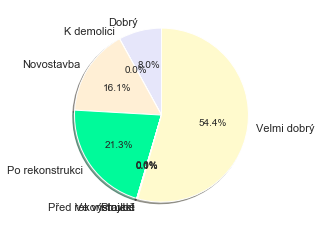

In [137]:
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 9)
labels = 'Dobrý', 'K demolici', 'Novostavba','Po rekonstrukci', 'Projekt', 'Před rekonstrukcí', 'Ve výstavbě','Velmi dobrý'

plt.pie(condition, 
        labels=labels, 
        autopct='%1.1f%%',
        colors=colors,
        shadow=True, 
        startangle=90)
plt.show()

In [138]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

We use box plot to better understand the strenght of the relationship between price and condition. 

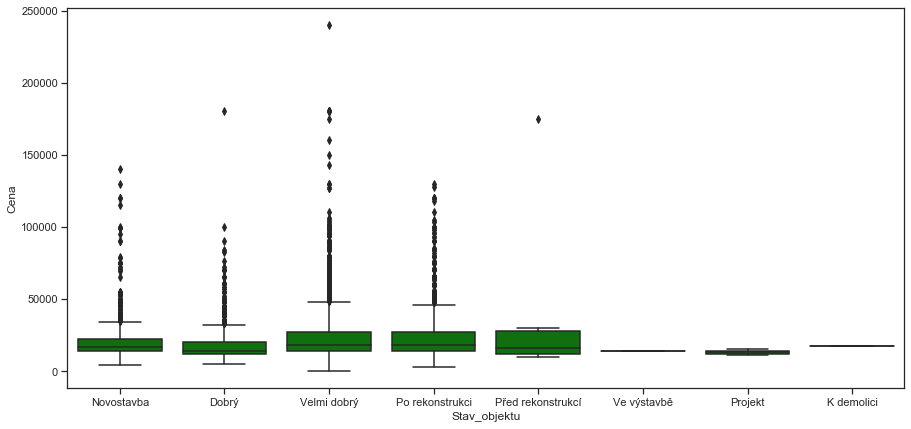

In [139]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=data1,
    x='Stav_objektu',
    y='Cena',
    color='green')

It is quite surprising that the prices "před rekonstrukcí" a "po rekonstrukci" do not differ much. On the other hand, the difference between "dobrý" and "velmi dobrý" follows the intuition.

## Number of floors

In [140]:
#By the analysis below, we confirm the expected - the floor seems not to be 
#considerably important driver of a price (with the exception of flats in cellar).

x = np.array(data1.Cena)
y = np.array(data1.Podlaží_č)
a = data1.groupby('Podlaží_č')['Cena'].mean()
print(a)

Podlaží_č
-1    10614.285714
 0    20222.758621
 1    19370.094972
 2    21843.314251
 3    21930.259935
 4    22963.783189
 5    24964.460474
 6    25779.676876
 7    25228.108696
 8    17061.325843
 9    16910.189189
Name: Cena, dtype: float64


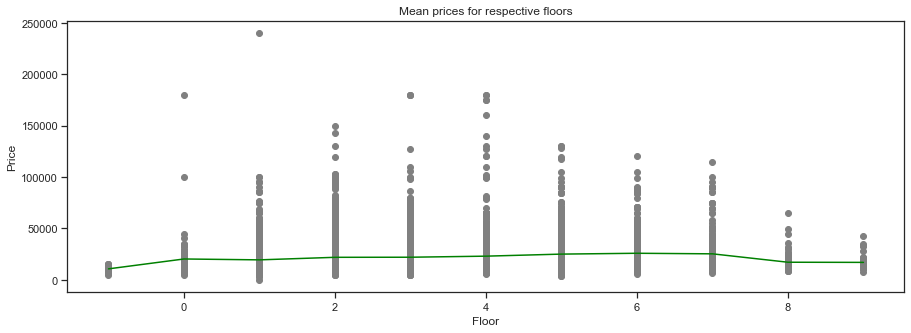

In [141]:
f = [-1,0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(15,5))
plt.plot(f, a, "green")
plt.title('Mean prices for respective floors')
plt.scatter(y, x, color="grey")
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

The flatness of the curve proves the hyphotesis that the price is not explained by floor.

## "Cukrárna" or "Hospoda" in neighborhood?

In [142]:
data1.groupby('Cena_cat2')['Cukrárna_dist'].mean()

Cena_cat2
(11.999, 10000.0]      444.615929
(10000.0, 11500.0]     420.437500
(11500.0, 12500.0]     419.190377
(12500.0, 13800.0]     389.510593
(13800.0, 14500.0]     391.311111
(14500.0, 15250.0]     370.386364
(15250.0, 16900.0]     385.692464
(16900.0, 18000.0]     343.847902
(18000.0, 20000.0]     356.740433
(20000.0, 22000.0]     332.250720
(22000.0, 25000.0]     314.852552
(25000.0, 29000.0]     290.197436
(29000.0, 35000.0]     310.143725
(35000.0, 45000.0]     200.570755
(45000.0, 240000.0]    212.103158
Name: Cukrárna_dist, dtype: float64

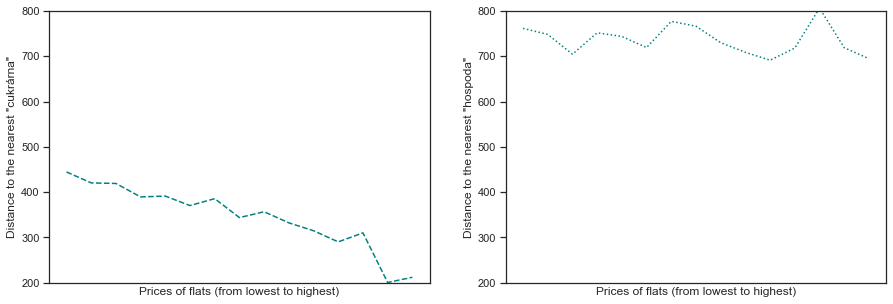

In [143]:
#Let's have a look whether the price category of a flat is somehow related to 
#closness of "coffe sweet shop bar" or a pub...

c = data1.groupby('Cena_cat2')['Cukrárna_dist'].mean()
d = data1.groupby('Cena_cat2')['Hospoda_dist'].mean()


plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
c.plot(color='teal',linestyle='dashed')
plt.xlabel('Prices of flats (from lowest to highest)')
plt.ylabel('Distance to the nearest "cukrárna"')
plt.xticks([])
plt.ylim(200,800)



plt.subplot(1, 2, 2)
d.plot(color='teal',linestyle='dotted')
plt.xlabel('Prices of flats (from lowest to highest)')
plt.ylabel('Distance to the nearest "hospoda"')
plt.ylim(200,800)
plt.xticks([])
plt.show()

<p>We can observe that distance to nearest cake shop is decreasing with the price you pay for renting the flat. It is interesting to note that the average distance to the nearest pub is constant. The distance of a pub does not depend on price category.</p><br>In this case, flats are divided into 15 cathegories so that it holds that each cathegory has similar size.

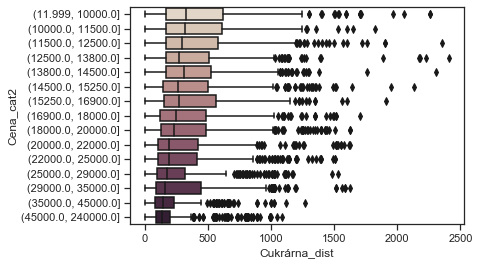

In [144]:
#Based on this very limited analysis (one could even call it "analysis that is absurdly blind 
#towards other much more important obvious factors of price), it seems that "cukrárna" just matters!
sns.boxplot( 
    x="Cukrárna_dist",
    y="Cena_cat2",
    palette="ch:.25", 
    data=data1)

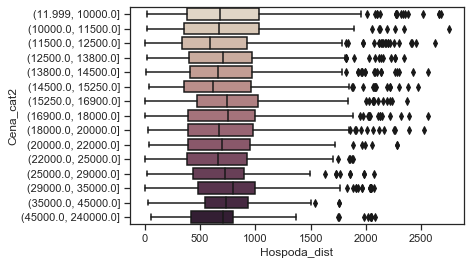

In [145]:
sns.boxplot( 
    x="Hospoda_dist",
    y="Cena_cat2",
    palette="ch:.25", 
    data=data1)

## Area of a flat
Area is one of the very first aspects that comes to one's mind when talking about a flat's price. Does our data suggest this?

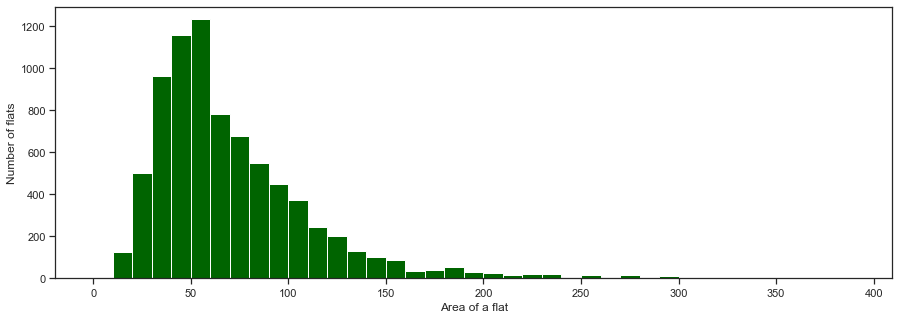

In [146]:
plt.figure(figsize=(15,5))
plt.hist(data1['Area'], np.arange(0,400, step = 10), width = 10, color = 'darkgreen')
plt.xlabel('Area of a flat')
plt.ylabel('Number of flats')
plt.show()

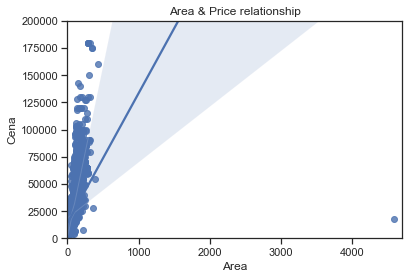

In [147]:
plt.title('Area & Price relationship')
plt.xlabel('Area')
plt.ylabel('Cena')
sns.regplot(data1['Area'],data1['Cena'])
plt.xlim((0, 4700))
plt.ylim((0,200000))
plt.show()

After exclusion of outliers we can see that the regression line fits better. This graph says that a small increase in area has more than proportional influence on price. 

## Energy demans

In [148]:
group_exm('Energy_class') #It is really surprising how large portion of flats belong to the worst - G - category.

Energy_class
A      54
B     616
C     867
D     395
E     120
F      47
G    3883
Name: Energy_class, dtype: int64

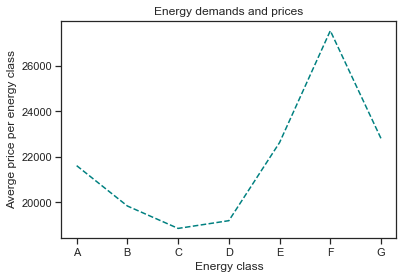

In [149]:
e = data1.groupby('Energy_class')['Cena'].mean()

e.plot(color='teal',linestyle='dashed')
plt.title('Energy demands and prices')
plt.xlabel('Energy class')
plt.ylabel('Averge price per energy class')
plt.show()

By this simple plot, one might hastily argue that the worse energy demands - the higher price,
which sounds somehow countra-intuitive (because bad energy demands are connected 
rather with old buildings that should be cheaper...). But let's give it further look.
This could be cause by the fact that in renting the energy is covered by the renter more often than by the rentee.

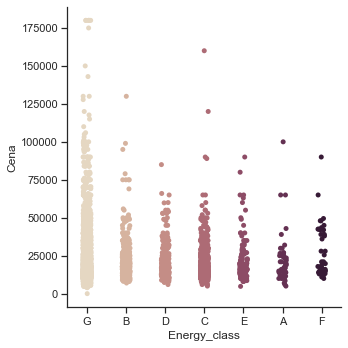

In [150]:
sns.catplot(
    x="Energy_class", 
    y="Cena", 
    palette="ch:.25", 
    data=data1)

Same graph is below, more precise but less aesthetic.

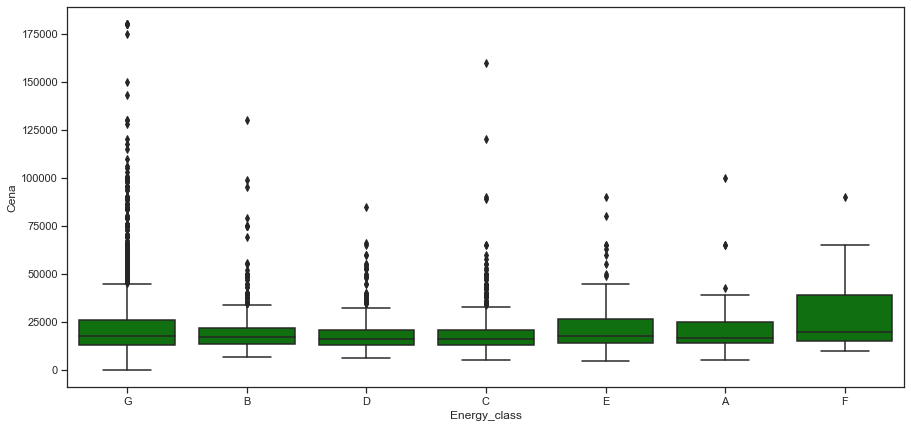

In [151]:
plt.figure(figsize=(15,7))
sns.boxplot(
    data=data1,
    x='Energy_class',
    y='Cena',
    color='green')

After closer look, it seems that the high average price of group G can be partially explained by quite high number of outliers. Still, some surprices remain - especially the relatively low prices of group A.

## Metro Distance Analysis

Now, we will used above techniques to analyse the distance from metro and price.


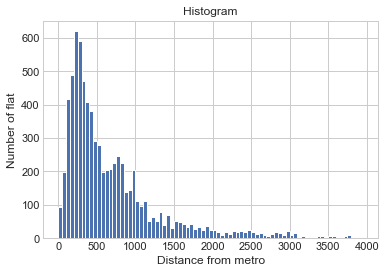

In [152]:
plt.style.use('seaborn-whitegrid')
bino = np.arange(0,4000, step = 50)
np.histogram(data1['Metro_dist'], bins =bino)
plt.hist(data1['Metro_dist'], bino)
plt.xlabel('Distance from metro')
plt.ylabel('Number of flat')
plt.title('Histogram')
plt.show()

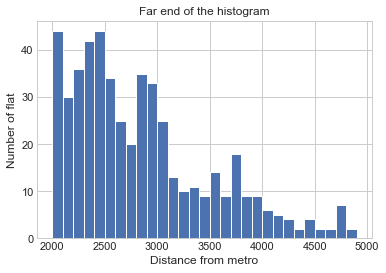

In [153]:
plt.style.use('seaborn-whitegrid')
bino = np.arange(2000,5000, step = 100)
np.histogram(data1['Metro_dist'], bins =bino)
plt.hist(data1['Metro_dist'], bino)
plt.xlabel('Distance from metro')
plt.ylabel('Number of flat')
plt.title("Far end of the histogram")
plt.show()

We can see that most of the flats are located near metro but not too close.

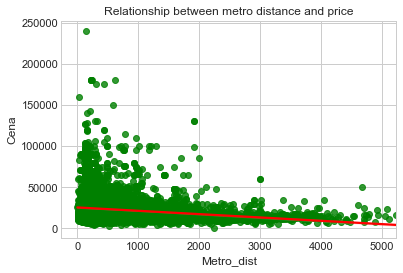

In [154]:
sns.regplot(
    data=data1,
    x='Metro_dist',
    y='Cena',
    color='green',
    fit_reg = True,
    line_kws = {'color':'red'})
plt.title("Relationship between metro distance and price")
plt.show()

This graph suggest that there is a negative relationship between the distance from metro and price

Let us examine cathegories of distance as well

In [155]:
data1['Metro_cat'] = pd.qcut(data1['Metro_dist'], q=15) 

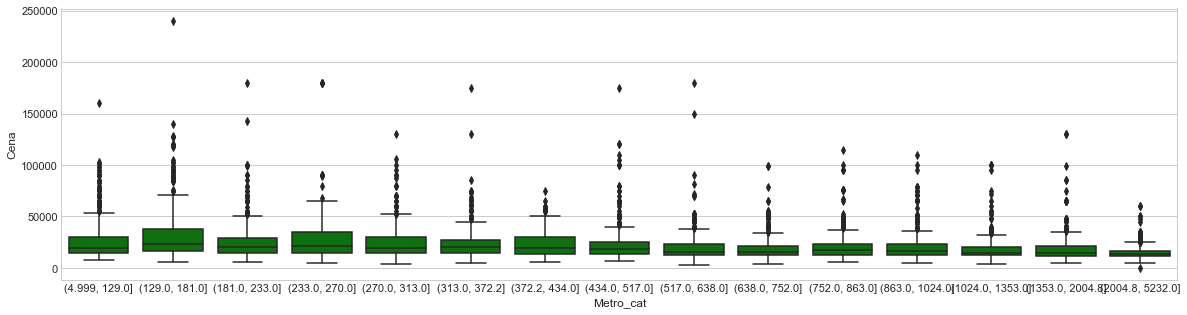

In [156]:
plt.figure(figsize=(20,5))
sns.boxplot(
    data=data1,
    x='Metro_cat',
    y='Cena',
    color='green')

plt.show()

When we cut down the distance into 15 cathegories with same number of members in each cathegory. The relationships looks rather flat but this graph is lower resolution than the previous one.

We had a hypothes that this could be done by high variance in cathegories. So we calculated it and ploted it. 

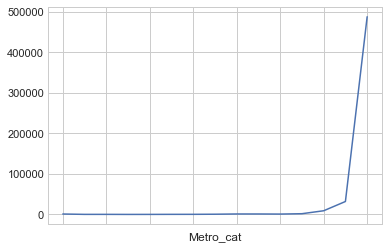

In [157]:
data1.groupby('Metro_cat')['Metro_dist'].var().plot()

The variance is high in last group. The curve looks flat until last category. This could be caused by large number of elements in each category. We will recategories and do the same process again.

In [158]:
bins = np.arange(0, 5250, step = 175)
data1['Metro_catb'] = pd.cut(data1['Metro_dist'], bins = bins) 

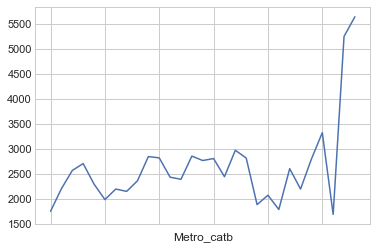

In [159]:
data1.groupby('Metro_catb')['Metro_dist'].var().plot()

This higher resolution picture confirmed our previous analysis. <br><br> Now, we will try to calculate linear regression.

In [160]:
import statsmodels.api as sm

In [161]:
#data1.dropna(subset = ["Metro_dist"], inplace=True)
#data1.dropna(subset = ["Cena"], inplace=True)
model = sm.OLS(data1["Cena"], data1['Metro_dist'], missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Cena   R-squared (uncentered):                   0.247
Model:                            OLS   Adj. R-squared (uncentered):              0.247
Method:                 Least Squares   F-statistic:                              2424.
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:50:07   Log-Likelihood:                         -85204.
No. Observations:                7404   AIC:                                  1.704e+05
Df Residuals:                    7403   BIC:                                  1.704e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Metro_dist    13.3372      0.271     49.235      0.000      12.806      13.868
==============================================================================
Omnibus:                     3067.223   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34739.513
Skew:                           1.668   Prob(JB):                         0.00
Kurtosis:                      13.074   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is an unexpected result. It says that the price increases with the distance from Metro station by 13 crown per 1 meter.
R^2 tells us that it explains 24% in variance in price. 

In [162]:
#plottin correlation matrix (too demanding for some notebooks leading to dead kernel - if interested, delete the "#" signs in the code)

#plt.figure(figsize=(14,10))
#corrMatrix = data1.corr()
#sns.heatmap(corrMatrix)
#plt.title("Correlation matrix")
#plt.show()

Plotting the correlation matrix provided us with interesting information. Price is higly correlated with Area and Plocha podlahova. Plocha podlahova and Area are the same in high percentage of cases. Price is more correlated with Bus_MHD_dist than with distance from Metro. 
The distance variables are correlated. This is probably not a causality but the fact that they have similar distribution. Of course it could be a causation in some case.
Elevator(Vytah) is correlated with floor(Podlazi_c). This could be a causation but it could also mean that the renter was more likely to reveal the information.

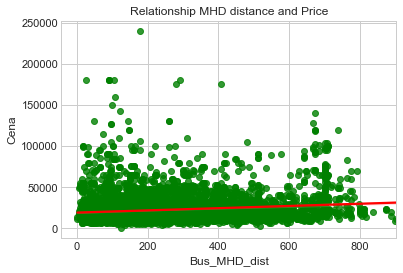

In [163]:
sns.regplot(
    data=data1,
    x='Bus_MHD_dist',
    y='Cena',
    color='green',
    fit_reg = True,
    line_kws = {'color':'red'})
plt.title("Relationship MHD distance and Price")
plt.show()

In last step, we will run a regression with all quantive variables.

In [164]:
X = ['Podlaží_č','Area', 'Bankomat_dist', 'Bus_MHD_dist', 'Výtah',
 'Cukrárna_dist','Divadlo_dist', 'Hospoda_dist',
'Hřiště_dist',  'Kino_dist', 'Kulturní_památka_dist', 'Lékař_dist', 'Lékárna_dist', 'Metro_dist', 'Obchod_dist',
'Pošta_dist', 'Restaurace_dist','Sportoviště_dist', 'Tram_dist', 'Veterinář_dist',  'Večerka_dist','Vlak_dist', 
 'Škola_dist', 'Školka_dist']
model1 = sm.OLS(data1["Cena"], data1[X], missing='drop').fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Cena   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              581.4
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:50:08   Log-Likelihood:                         -50753.
No. Observations:                4626   AIC:                                  1.016e+05
Df Residuals:                    4602   BIC:                                  1.017e+05
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Podlaží_č               715.8866    117.218      6.107      0.000     486.083     945.690
Area                     77.2063      2.681     28.798      0.000      71.950      82.462
Bankomat_dist             4.0295      1.412      2.854      0.004       1.262       6.797
Bus_MHD_dist             16.1373      1.330     12.135      0.000      13.530      18.744
Výtah                  6618.2906    535.596     12.357      0.000    5568.265    7668.316
Cukrárna_dist            -1.0634      0.991     -1.073      0.283      -3.006       0.879
Divadlo_dist             -1.2211      0.468     -2.610      0.009      -2.138      -0.304
Hospoda_dist              1.3695      0.552      2.479      0.013       0.286       2.453
Hřiště_dist               5.4605      1.333      4.096      0.000       2.847       8.074
Kino_dist                 0.2442      0.286      0.853      0.394      -0.317       0.805
Kulturní_památka_dist    -1.8249      0.290     -6.292      0.000      -2.393      -1.256
Lékař_dist               -1.1218      1.146     -0.979      0.328      -3.369       1.125
Lékárna_dist              2.7435      1.146      2.394      0.017       0.497       4.990
Metro_dist               -1.8321      0.423     -4.334      0.000      -2.661      -1.003
Obchod_dist              -0.2635      0.492     -0.535      0.593      -1.229       0.702
Pošta_dist               -2.9581      0.872     -3.391      0.001      -4.669      -1.248
Restaurace_dist          -2.6707      2.143     -1.246      0.213      -6.872       1.531
Sportoviště_dist          5.8690      0.827      7.097      0.000       4.248       7.490
Tram_dist                 0.4774      0.526      0.908      0.364      -0.553       1.508
Veterinář_dist            1.7427      0.693      2.513      0.012       0.383       3.102
Večerka_dist              7.8439      1.286      6.100      0.000       5.323      10.365
Vlak_dist                 3.1771      0.424      7.495      0.000       2.346       4.008
Škola_dist               -9.9201      1.618     -6.130      0.000     -13.093      -6.747
Školka_dist               0.2176      1.364      0.159      0.873      -2.457       2.893
==============================================================================
Omnibus:                     2199.212   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2681740.512
Skew:                          -0.697   Prob(JB):                         0.00
Kurtosis:                     120.945   Cond. No.                     8.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors i

Comment:
We would have an hypothesis that, variable talking about distance should be negative. Which is not always true. Metro_dist is slightly negative. The interpretation would be that the with increased distance by one meter the price would drop by 1.83 czk. It is not too much. 

# B) GEOPANDAS SPATIAL ANALYSIS

First, we upload the Prague districts (from the open data source www.geoportalpraha.cz/cs/data/otevrena-data/). Second, having the data prepared with location column (latitude, longitude), we can put all of this together to enjoy juicy visualizations of number of supplid flats per district or average prices per district. At the end, there is also a bonus showing the paths how to work with realistic map of Prague using folium package. 

In [165]:
import geopandas as gpd #geopandas is bell installed in anaconda prompt with "conda install geopandas"

It may happen that some dependancies of geopandas wont be installed. In that case, use may want to use anaconda prompt again with for example 'conda install descartes'

## Preparing the settup
### Upload Prague districts from open sources 

In [166]:
mestske_casti = gpd.read_file('TMMESTSKECASTI_P.json') 
# loading the open data of Prague's districts in JSON form 
# (JSON is the best option as it is easily readable and does not rely on other files)

In [167]:
print(mestske_casti.head(2)) #Let's explore the file's content

#Especially column "geometry" is crucial for the analysis as it defines precisely all the coordinates of districts' polygons

   OBJECTID       DAT_VZNIK       DAT_ZMENA       PLOCHA  ID  KOD_MC  \
0         1  20181106141412  20191105233720  10183715.83  25  547310   
1         2  20171110095818  20190423111436  13529637.40   9  547361   

         NAZEV_MC  KOD_MO KOD_SO  TID_TMMESTSKECASTI_P   POSKYT  ID_POSKYT  \
0  Praha-Čakovice      94    221                    25  HMP-IPR         43   
1        Praha 14      94    141                     9  HMP-IPR         43   

  STAV_ZMENA   NAZEV_1  Shape_Length    Shape_Area  \
0          U  Čakovice  18510.070841  1.018372e+07   
1          U  Praha 14  21694.540664  1.352964e+07   

                                            geometry  
0  POLYGON ((-733714.400 -1035864.400, -733688.20...  
1  POLYGON ((-733418.050 -1044942.710, -733418.90...  


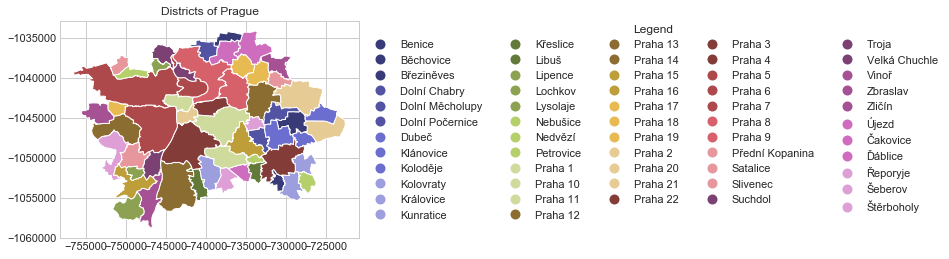

In [168]:
leg_kwds= {'title':'Legend',
          'loc':'upper left',
           'bbox_to_anchor':(1.0,1.03),
          'ncol':5}

mestske_casti.plot(column='NAZEV_1', cmap= 'tab20b', 
                   legend = True, legend_kwds=leg_kwds)
plt.title('Districts of Prague')
plt.show()

### Last data adjustments... for comfortable geospatial analysis

In [276]:
#Let's prepare data that are needed for our analysis...
useful = ['Cena', 'Cena_cat','location']
data_s = data1[useful].copy()
data_s = data_s.dropna()
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7555 entries, 0 to 7877
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Cena      7555 non-null   float64 
 1   Cena_cat  7555 non-null   category
 2   location  7555 non-null   object  
dtypes: category(1), float64(1), object(1)
memory usage: 185.4+ KB


In [277]:
#Check for NaNs - it seems OK, but...
data_s.isnull().values.any().sum().sum()

0

In [278]:
#...as NaNs are generated as strings in the column 'location', the method .dropna() doesn't work here.
#Hence, we get rid of the NaNs in this way:
location_x = data_s['location'].replace("NaN","0") 
data_s['location_x'] = location_x
data_s = data_s[data_s.location_x != "0"]

In [279]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7555 entries, 0 to 7877
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Cena        7555 non-null   float64 
 1   Cena_cat    7555 non-null   category
 2   location    7555 non-null   object  
 3   location_x  7555 non-null   object  
dtypes: category(1), float64(1), object(2)
memory usage: 244.4+ KB


Seems that everything is fine, we just left out some values (either due to authors who did not state the price at all in their ad, or due to some possible imperfections of our automatic process of GPS coordinates generation). Yet, the loss seems not to be catastrophic - from 7878 observation, we get to 7645 observation with full info about prices and 7555 observations with valid values in location information, i.e. 96 % of data remains. Furthermore, we have no reason to suspect this loss to follow some underlaying pattern that would affect our analysis, i.e. we can assume randomness of this observations removals. 

In [206]:
#Having non-null locations, we can extract the separate coordinates out of the location:
lat = []
lng = []

for item in data_s.location_x:
    loc = item.split(',')
    loc_1 = float(loc[0].replace("(",""))
    loc_2 = float(loc[1].replace(")",""))
    lat.append(loc_1)
    lng.append(loc_2)

In [215]:
data_s['lat'] = lat
data_s['lng'] = lng
data_s.head(2)

,Cena,Cena_cat,location,location_x,lat,lng
0,12000.0,"(10000, 20000]","(50.1017892, 14.5615725)","(50.1017892, 14.5615725)",50.101789,14.561573
1,9500.0,"(0, 10000]","(50.0821429, 14.4537291)","(50.0821429, 14.4537291)",50.082143,14.453729


## Analysing where flats are offered at the most

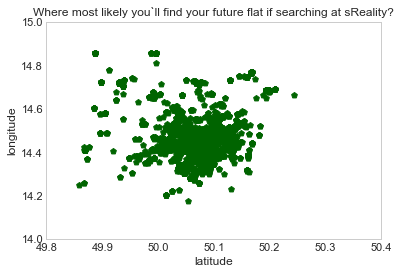

In [216]:
#Let's have a look how flats' offers are dispersed within Prague?
plt.scatter(x = data_s.lat, y= data_s.lng, c = 'darkgreen', marker = 'p')
plt.grid()
plt.xlim((49.8, 50.4))
plt.ylim((14.0,15.0))
plt.title('Where most likely you`ll find your future flat if searching at sReality?')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

Obviously, such "map" does not tell us much... We need to link it to the real interactive map of Prague or at least (non-interactive) map of districts. So let's put together this scatter plot and info that it contains with the maps defined/imported above.

In [239]:
#For doing so we need to create a GeoDataFrames from a DataFrames. Even before that we need to create a "GEOMETRY"
#column in our data_s. "Geometry" is a special-format column absolutelly key for any geospatial analysis.
#In case of areas (e.g. town's districts) it has a form of POLYGONS. In our case, it has a form of POINT.

from shapely.geometry import Point

data_s['geometry'] = data_s.apply(lambda x: Point((x.lng,x.lat)),axis = 1)
flats_crs = {'init': 'epsg:4326'}

flats_geo = gpd.GeoDataFrame(data_s, crs = flats_crs, geometry = data_s.geometry)
mc_geo = gpd.GeoDataFrame(mestske_casti, crs = flats_crs, geometry = mestske_casti.geometry)

/Users/marketamala/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [240]:
#converting geometry from decimal degrees to meters
flats_geo.geometry = flats_geo.geometry.to_crs(epsg = 3857)
mc_geo.geometry = mc_geo.geometry.to_crs(epsg = 3857)

In [241]:
#This is a crucial part that analyse the geospacial intersection of our flats (POINTS) and concrete districts (POLYGONS).
flats_within_districts = gpd.sjoin(mc_geo, flats_geo, op = 'intersects')
flats_within_districts.head(3)

,OBJECTID,DAT_VZNIK,DAT_ZMENA,PLOCHA,ID,KOD_MC,NAZEV_MC,KOD_MO,KOD_SO,TID_TMMESTSKECASTI_P,...,Shape_Length,Shape_Area,geometry,index_right,Cena,Cena_cat,location,location_x,lat,lng
0,1,20181106141412,20191105233720,10183715.83,25,547310,Praha-Čakovice,94,221,25,...,18510.070841,1.018372e+07,"POLYGON ((1617886.913 6474419.003, 1617943.831...",2392,18500.0,"(10000, 20000]","(50.147173, 14.5327151)","(50.147173, 14.5327151)",50.147173,14.532715
0,1,20181106141412,20191105233720,10183715.83,25,547310,Praha-Čakovice,94,221,25,...,18510.070841,1.018372e+07,"POLYGON ((1617886.913 6474419.003, 1617943.831...",2064,14000.0,"(10000, 20000]","(50.147173, 14.5327151)","(50.147173, 14.5327151)",50.147173,14.532715
0,1,20181106141412,20191105233720,10183715.83,25,547310,Praha-Čakovice,94,221,25,...,18510.070841,1.018372e+07,"POLYGON ((1617886.913 6474419.003, 1617943.831...",1569,14900.0,"(10000, 20000]","(50.152145, 14.5278154)","(50.152145, 14.5278154)",50.152145,14.527815


In [244]:
#After exloring the intersections one by one case (through the .sjoin method), we can now group them...

flats_in_districts = flats_within_districts[['NAZEV_MC','index_right']
            ].groupby('NAZEV_MC').count().sort_values('index_right', ascending = False)

#...and convert the results into a brand new dataframe.
flats_in_districts_df = pd.DataFrame(flats_in_districts) 
flats_in_districts_df.reset_index(inplace=True) 
flats_in_districts_df.columns = ['NAZEV_MC','Flats_count']
flats_in_districts_df.head()

,NAZEV_MC,Flats_count
0,Praha 1,1252
1,Praha 5,814
2,Praha 2,741
3,Praha 3,692
4,Praha 8,533


In [245]:
#Our task now is to merge these Flats_counts into map and visualize it...
#Before merging, we need be sure we're considering only those districts that are present in both dataframes 
#(to have the same lenght of DataFrames)
mestske_casti_df = pd.DataFrame(mestske_casti)
mylist = list(flats_in_districts_df.NAZEV_MC)
mestske_casti_df_x = mestske_casti_df[mestske_casti_df.NAZEV_MC.isin(mylist)]

In [247]:
#merging the two dataframes into one, based on the common column 'NAZEV_MC'
districts_with_counts = pd.merge(mestske_casti_df_x,flats_in_districts_df, on = 'NAZEV_MC') 

In [248]:
#Now, when having merged the dataframes, we need to convert them into GeoDataFrame...
districts_with_counts = gpd.GeoDataFrame(districts_with_counts, crs = flats_crs, geometry = districts_with_counts.geometry)

/Users/marketamala/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


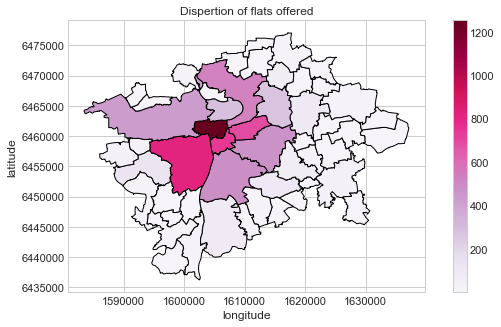

In [259]:
#...and visualize it in the map:
districts_with_counts.plot(column = 'Flats_count', 
                           edgecolor = 'black', cmap = 'PuRd',
                           figsize=(10,5), legend = True)
plt.title('Dispertion of flats offered')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

## Analysing average prices of supplied flats per district

In [255]:
#For analysis of average prices per district, we will start with the spatially joined GeoDataFrame
flats_within_districts.head(3)

,OBJECTID,DAT_VZNIK,DAT_ZMENA,PLOCHA,ID,KOD_MC,NAZEV_MC,KOD_MO,KOD_SO,TID_TMMESTSKECASTI_P,...,Shape_Length,Shape_Area,geometry,index_right,Cena,Cena_cat,location,location_x,lat,lng
0,1,20181106141412,20191105233720,10183715.83,25,547310,Praha-Čakovice,94,221,25,...,18510.070841,1.018372e+07,"POLYGON ((1617886.913 6474419.003, 1617943.831...",2392,18500.0,"(10000, 20000]","(50.147173, 14.5327151)","(50.147173, 14.5327151)",50.147173,14.532715
0,1,20181106141412,20191105233720,10183715.83,25,547310,Praha-Čakovice,94,221,25,...,18510.070841,1.018372e+07,"POLYGON ((1617886.913 6474419.003, 1617943.831...",2064,14000.0,"(10000, 20000]","(50.147173, 14.5327151)","(50.147173, 14.5327151)",50.147173,14.532715
0,1,20181106141412,20191105233720,10183715.83,25,547310,Praha-Čakovice,94,221,25,...,18510.070841,1.018372e+07,"POLYGON ((1617886.913 6474419.003, 1617943.831...",1569,14900.0,"(10000, 20000]","(50.152145, 14.5278154)","(50.152145, 14.5278154)",50.152145,14.527815


In [256]:
#We will work similarly as in the previous case, but this time we do not count number of flats per district (".count()")
#but average price of flats within each district (".mean()")
prices_per_districts = flats_within_districts[['NAZEV_MC','Cena']
            ].groupby('NAZEV_MC').mean().sort_values('Cena', ascending = False)

#...and convert the results into a brand new dataframe.
prices_per_districts_df = pd.DataFrame(prices_per_districts) 
prices_per_districts_df.reset_index(inplace=True) 
prices_per_districts_df.columns = ['NAZEV_MC','Average_price']
prices_per_districts_df.head()

,NAZEV_MC,Average_price
0,Praha-Troja,35490.000000
1,Praha 1,29580.017572
2,Praha 2,29259.036437
3,Praha 6,25502.393519
4,Praha 3,23202.219653


In [266]:
#merging this new dataframe with our prague districts
districts_with_prices = pd.merge(mestske_casti_df,prices_per_districts_df, on = 'NAZEV_MC')
#and converting it to GeoDataFrame format
districts_with_prices = gpd.GeoDataFrame(districts_with_prices, crs = flats_crs, geometry = districts_with_prices.geometry)

/Users/marketamala/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


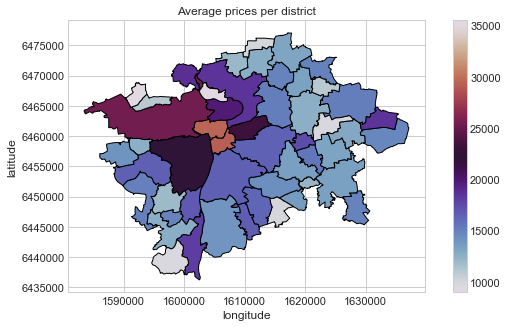

In [269]:
#...and visualize it in the map:

districts_with_prices.plot(column = 'Average_price', 
                           edgecolor = 'black', cmap = 'twilight',
                           figsize=(10,5), legend = True)

plt.title('Average prices per district')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

Similarly, we could process any other variable of our interest...

## (B) BONUS part

### Interactive map of Prague
As a bonus, we attach a draft of how one would start if decided to visualize the data in a realistic map instead of the defined polygons. 

Using folium package, we define an interactive map of Prague, centered with the National Theatre.

In [280]:
import folium

Prague = folium.Map(location=[50.0811583,14.4134967], zoom_start = 12) #the location corresponds to the National Theatre
display(Prague)

In [281]:
#One can very interestingly display various things into the interactive map (e.g. the Prague 3 only as shown below). 
#This would be a nice alternative way of our geospatial visualizations 
#if we did not decided to use the dataframe of districts instead.

Prague = folium.Map(location=[50.0811583,14.4134967], zoom_start = 12)
Prague_3 = mc_geo.loc[mc_geo.NAZEV_MC =='Praha 3']
folium.GeoJson(Prague_3).add_to(Prague)
display(Prague)

### Thank you for getting through our code to the very end. We hope it was somehow interesting for you and will be happy for any feedback! 

Have a lovely day, 
## Markéta & Josef
Spring 2020